In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
import numpy as np
from scipy.stats import pearsonr

# Read file dataset from CSV
data = pd.read_csv("Survei Pengguna Produk Simpanan Individu.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                        --------------  -----  
 0   Timestamp                                                                                                                                                                                           

In [177]:
data.rename(columns = {
    "Timestamp":"jejak waktu",
    "Kami mohon kesediaan Anda untuk menjawab pertanyaan-pertanyaan pada section berikutnya dengan jujur dan sesuai dengan produk simpanan individu yang Anda miliki. Dengan lanjut ke section berikutnya, Anda menyetujui bahwa seluruh data (terkecuali nama dan nomor telepon undian) akan digunakan sebagai bahan penelitian.":"perizinan",
    "Produk simpanan individu apa yang Anda gunakan?":"PSI",
    "Nama / Inisial":"nama",
    "Nomor Telepon - GOPAY/OVO/SHOPEEPAY":"nomor_telepon",
    "Umur":"umur",
    "Domisili":"domisili",
    "Gender":"gender",
    "Status Perkawinan":"status_perkawinan",
    "Jumlah Tanggungan":"jumlah_tanggungan",
    "Kegiatan atau pekerjaan saat ini":"profesi",
    "Apa tujuan pengunaan produk simpanan individu yang Anda pilih?":"tujuan",
    "Berapa jumlah rata-rata penghasilan Anda per bulan?":"penghasilan",
    "Seberapa besar rata-rata persentase penghasilan yang Anda tabung?":"persentasi_tabungan",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki fungsionalitas yang baik?":"rate_fungsionalitas",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki biaya admin yang sesuai dengan fungsi yang Anda dapatkan?":"rate_admin",
    "Menurut Anda, apakah produk simpanan individu yang anda gunakan memiliki limit tabungan yang sesuai dengan kebutuhan Anda?":"rate_limit",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki bunga tabungan yang sesuai dengan keinginan Anda?":"rate_bunga",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki syarat setoran awal yang memberatkan?":"rate_setoran_awal",
    "Apakah produk simpanan individu yang Anda gunakan sudah sesuai dan cocok dengan kebutuhan, kemampuan, dan keinginan Anda?":"rate_kebutuhan",
    "Apakah ada alasan lain di luar bunga, limit, dan biaya admin yang membuat Anda memutuskan untuk menggunakan produk simpanan individu tersebut?":"alasan_lainnya"
    }, 
            inplace = True)

print(data)

             jejak waktu                        perizinan                 PSI  \
0    12/11/2024 16:35:12  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
445  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
446  21/12/2024 19:39:57  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
447  24/12/2024 11:36:35  Setuju dan saya bersedia lanjut    Tabungan Pelajar   
448  26/12/2024 17:56:22  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
449  28/12/2024 16:31:51  Setuju dan saya bersedia lanjut    Tabungan Regular   

                 nama      

jejak waktu              0
perizinan                0
PSI                      2
nama                    81
nomor_telepon           92
umur                     2
domisili                 2
gender                   2
status_perkawinan        2
jumlah_tanggungan        2
profesi                  2
tujuan                   2
penghasilan              2
persentasi_tabungan      2
rate_fungsionalitas      2
rate_admin               2
rate_limit               2
rate_bunga               2
rate_setoran_awal        2
rate_kebutuhan           2
alasan_lainnya         196
dtype: int64

 ---Visualization---


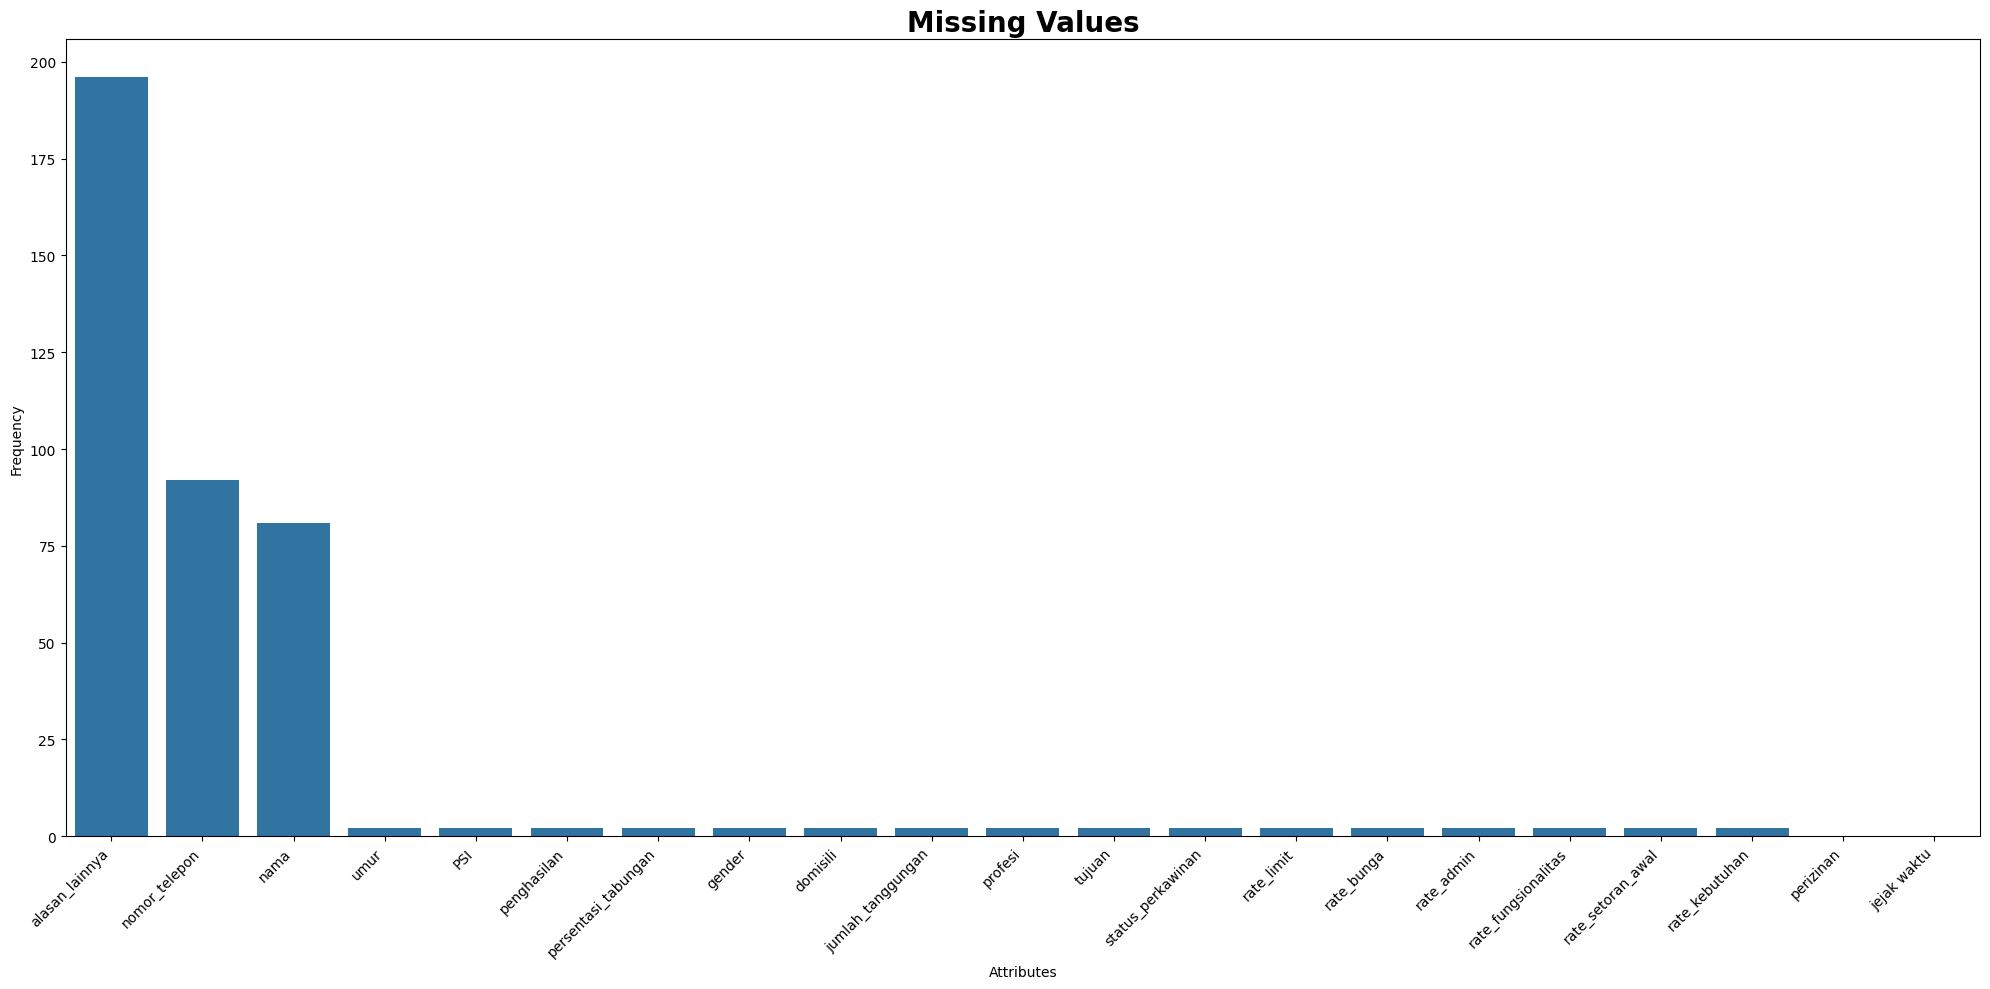

In [178]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()

In [179]:
# Hapus data by label
data.dropna(subset=['PSI'], inplace=True)


# Cek missing value
print(data.isnull().sum())

jejak waktu              0
perizinan                0
PSI                      0
nama                    79
nomor_telepon           90
umur                     0
domisili                 0
gender                   0
status_perkawinan        0
jumlah_tanggungan        0
profesi                  0
tujuan                   0
penghasilan              0
persentasi_tabungan      0
rate_fungsionalitas      0
rate_admin               0
rate_limit               0
rate_bunga               0
rate_setoran_awal        0
rate_kebutuhan           0
alasan_lainnya         194
dtype: int64


C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\bcamaster\AppData\Roaming\Python\Python310\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Cons

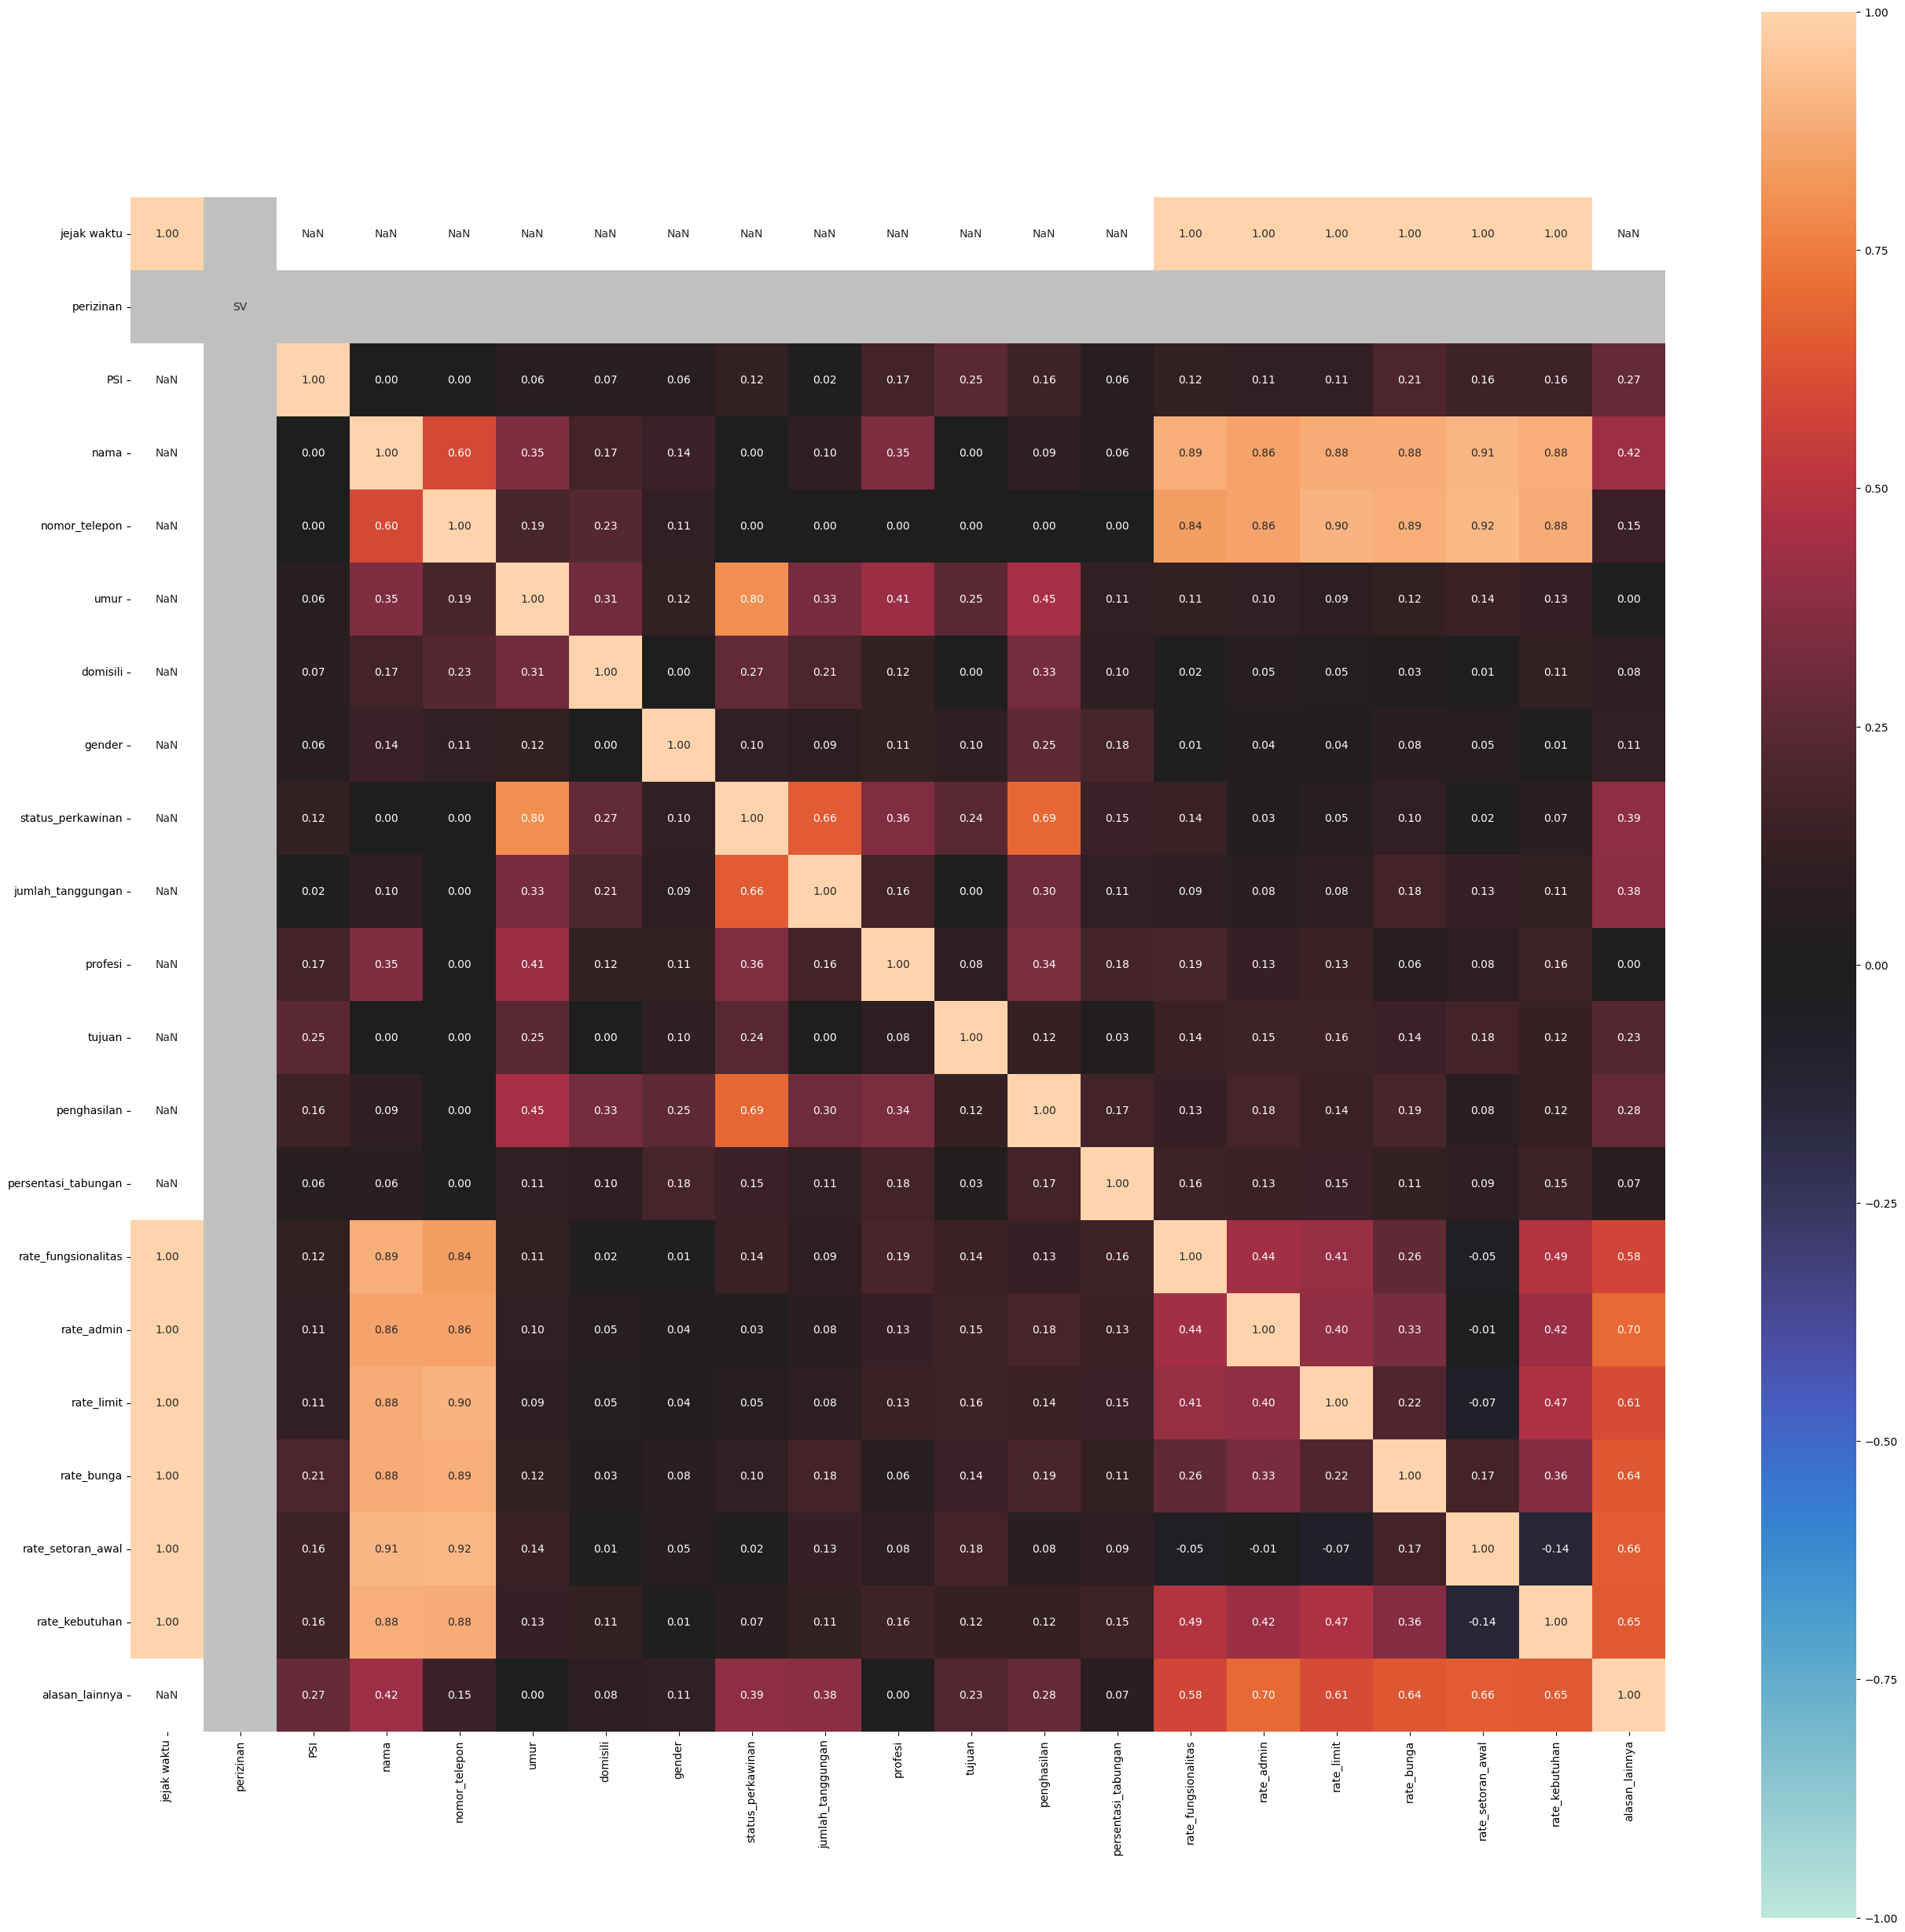

In [180]:
correlations = associations(data)
corr = correlations['corr']

In [181]:
# tampilin nilai corr mat by label
print(corr['PSI'])

jejak waktu            0.000000
perizinan              0.000000
PSI                    1.000000
nama                   0.000000
nomor_telepon          0.000000
umur                   0.059003
domisili               0.069054
gender                 0.061532
status_perkawinan      0.115047
jumlah_tanggungan      0.015509
profesi                0.168007
tujuan                 0.249911
penghasilan            0.159413
persentasi_tabungan    0.058629
rate_fungsionalitas    0.116634
rate_admin             0.107100
rate_limit             0.108607
rate_bunga             0.207091
rate_setoran_awal      0.162184
rate_kebutuhan         0.155289
alasan_lainnya         0.274937
Name: PSI, dtype: float64


In [182]:
irrelevant_attributes = corr['PSI'][corr['PSI'] < 0.05].keys()
print("Kolom yang akan dihapus:", irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.05
for item in irrelevant_attributes:
    # Hapus kolom dengan nama yang ada di variabel `item`
    data.drop([item], axis=1, inplace=True)

print(data.columns)

Kolom yang akan dihapus: Index(['jejak waktu', 'perizinan', 'nama', 'nomor_telepon',
       'jumlah_tanggungan'],
      dtype='object')
Index(['PSI', 'umur', 'domisili', 'gender', 'status_perkawinan', 'profesi',
       'tujuan', 'penghasilan', 'persentasi_tabungan', 'rate_fungsionalitas',
       'rate_admin', 'rate_limit', 'rate_bunga', 'rate_setoran_awal',
       'rate_kebutuhan', 'alasan_lainnya'],
      dtype='object')


In [183]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
data['PSI'] = label_encoder.fit_transform(data['PSI'])
data['umur'] = label_encoder.fit_transform(data['umur'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['status_perkawinan'] = label_encoder.fit_transform(data['status_perkawinan'])
data['profesi'] = label_encoder.fit_transform(data['profesi'])
data['tujuan'] = label_encoder.fit_transform(data['tujuan'])
data['penghasilan'] = label_encoder.fit_transform(data['penghasilan'])
data['persentasi_tabungan'] = label_encoder.fit_transform(data['persentasi_tabungan'])
data['rate_fungsionalitas'] = label_encoder.fit_transform(data['rate_fungsionalitas'])
data['rate_admin'] = label_encoder.fit_transform(data['rate_admin'])
data['rate_limit'] = label_encoder.fit_transform(data['rate_limit'])
data['rate_bunga'] = label_encoder.fit_transform(data['rate_bunga'])
data['domisili'] = label_encoder.fit_transform(data['domisili'])
data['rate_setoran_awal'] = label_encoder.fit_transform(data['rate_setoran_awal'])

In [184]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder

X = data.drop(columns=["PSI"])  # PSI kan labelnya nih
y = data["PSI"]

# One-Hot Encoding untuk data kategori
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi ke DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Buat model Xtra Trees
model = ExtraTreesClassifier(n_estimators=50, max_features="log2", random_state=42)
model.fit(X_train, y_train)

# Prediksi & Evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Pake weighted karena Jika dataset memiliki jumlah sampel per kelas yang tidak seimbang, sehingga kelas mayoritas lebih berpengaruh
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.5889
Precision: 0.4592
Recall: 0.5889
F1-Score: 0.4939


c:\Users\bcamaster\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [185]:
y_train_pred = model.predict(X_train)

# Menghitung metrik evaluasi untuk data training
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f"Akurasi (Training): {train_accuracy:.4f}")
print(f"Precision (Training): {train_precision:.4f}")
print(f"Recall (Training): {train_recall:.4f}")
print(f"F1-Score (Training): {train_f1:.4f}")

Akurasi (Training): 1.0000
Precision (Training): 1.0000
Recall (Training): 1.0000
F1-Score (Training): 1.0000


Random Sampling

In [186]:
from imblearn.over_sampling import RandomOverSampler

# **Random Oversampling**
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Buat model Extra Trees
model = ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil
print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.4556
Precision: 0.3976
Recall: 0.4556
F1-Score: 0.4237


c:\Users\bcamaster\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bcamaster\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [187]:
y_train_pred = model.predict(X_train)

# Menghitung metrik evaluasi untuk data training
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f"Akurasi (Training): {train_accuracy:.4f}")
print(f"Precision (Training): {train_precision:.4f}")
print(f"Recall (Training): {train_recall:.4f}")
print(f"F1-Score (Training): {train_f1:.4f}")

Akurasi (Training): 0.9944
Precision (Training): 0.9947
Recall (Training): 0.9944
F1-Score (Training): 0.9945


Hybrid

In [188]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import pandas as pd

print("Jumlah record per kelas sebelum resampling:")
print(data['PSI'].value_counts())

# List untuk menampung hasil resampling
resampled_dfs = []

# Melakukan upsampling hanya pada kelas yang memiliki jumlah kurang dari 50
for class_label in data['PSI'].unique():
    class_data = data[data['PSI'] == class_label]
    
    # Cek jika jumlah data pada kelas kurang dari 50
    if len(class_data) < 50:
        resampled_dfs.append(class_data)
        class_data_upsampled = resample(class_data,
                                        replace=True,  # Sampling dengan penggantian
                                        n_samples=100,  # Mengambil sampel sampai mencapai 50
                                        random_state=42)  # Untuk hasil yang konsisten
        resampled_dfs.append(class_data_upsampled)
    else:
        resampled_dfs.append(class_data)
        if len(class_data) > 100:
            resampled_dfs.append(class_data)
            class_data_downsampled = resample(class_data,
                                        replace=True,  # Sampling dengan penggantian
                                        n_samples=100,  # Mengambil sampel sampai mencapai 50
                                        random_state=42)  # Untuk hasil yang konsisten
            resampled_dfs.append(class_data_downsampled)
        # Jika jumlah data sudah cukup (>= 50), masukkan data aslinya
        else:
            resampled_dfs.append(class_data)

# Gabungkan kembali data setelah resampling
data = pd.concat(resampled_dfs)

print("\nJumlah record per kelas setelah resampling:")
print(data['PSI'].value_counts())

# Hapus kolom yang tidak diperlukan
data.drop(columns=['alasan_lainnya'], inplace=True, errors='ignore')

# Pisahkan kembali fitur (X) dan target (y)
X = data.drop(columns=['PSI'])
y = data['PSI']

# Split data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Buat model Xtrees
model = ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test_resampled)

# Cek kesamaan jumlah data
print(f"Jumlah data y_test_resampled: {len(y_test_resampled)}")
print(f"Jumlah data y_pred: {len(y_pred)}")

# Evaluasi model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred, average='weighted')
recall = recall_score(y_test_resampled, y_pred, average='weighted')
f1 = f1_score(y_test_resampled, y_pred, average='weighted')

# Print hasil
print(f"Akurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Jumlah record per kelas sebelum resampling:
PSI
6    275
0     57
3     40
1     18
8     18
2     14
4     13
5     10
7      3
Name: count, dtype: int64

Jumlah record per kelas setelah resampling:
PSI
6    650
3    140
1    118
8    118
0    114
2    114
4    113
5    110
7    103
Name: count, dtype: int64
Jumlah data y_test_resampled: 474
Jumlah data y_pred: 474
Akurasi: 0.9641
Precision: 0.9656
Recall: 0.9641
F1-Score: 0.9620


In [189]:
# Prediksi pada training set
y_train_pred = model.predict(X_train_resampled)

# Evaluasi akurasi pada training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Akurasi (Training): {train_accuracy:.4f}")
print(f"Precision (Training): {train_precision:.4f}")
print(f"Recall (Training): {train_recall:.4f}")
print(f"F1-Score (Training): {train_f1:.4f}")

Akurasi (Training): 0.9928
Precision (Training): 0.9947
Recall (Training): 0.9944
F1-Score (Training): 0.9945
